In [2]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Categories=['NORMAL','PNEUMONIA']

In [4]:
flat_data_arr=[]
target_arr=[]

In [5]:
datadir = 'D:/github/archive/chest_xray/train'

In [6]:
for i in Categories:

    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : NORMAL
loaded category:NORMAL successfully
loading... category : PNEUMONIA
loaded category:PNEUMONIA successfully


In [7]:
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

In [8]:
df=pd.DataFrame(flat_data)
df['Target']=target

In [9]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [10]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0]
The actual data is:
[0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0]
The model is 92.85714285714286% accurate


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred, target_names=['NORMAL', 'PNEUMONIA']))
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Categories)
disp.plot()

                 precision    recall  f1-score   support

         Normal       0.93      0.93      0.93        14
Viral Pneumonia       0.93      0.93      0.93        14

       accuracy                           0.93        28
      macro avg       0.93      0.93      0.93        28
   weighted avg       0.93      0.93      0.93        28



Enter URL of Image :/content/drive/MyDrive/Deep_Learning_project/Chest_X_ray DataSet/Covid19-dataset/test/Normal/0101.jpeg


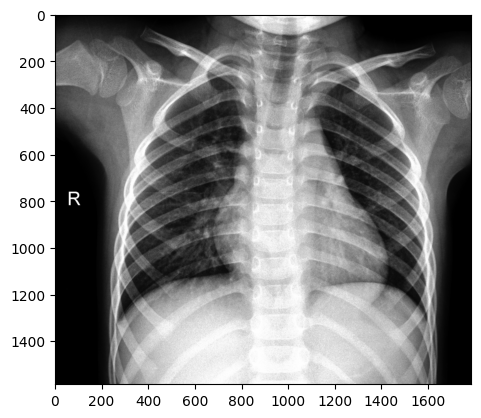

Normal = 66.3471428089318%
Viral Pneumonia = 33.6528571910682%
The predicted image is : Normal


In [19]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

Enter URL of Image :/content/drive/MyDrive/Deep_Learning_project/Chest_X_ray DataSet/Covid19-dataset/test/Viral Pneumonia/0102.jpeg


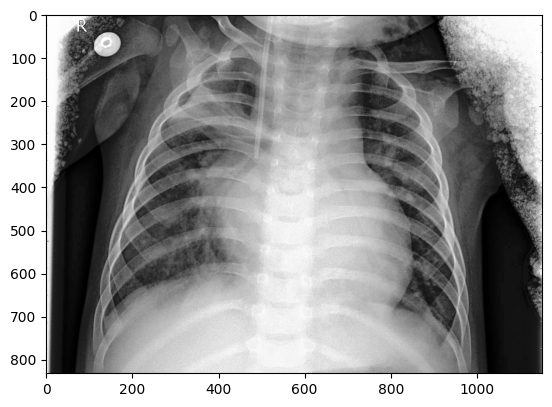

Normal = 6.378156301483003%
Viral Pneumonia = 93.621843698517%
The predicted image is : Viral Pneumonia


In [20]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])